<a href="https://colab.research.google.com/github/gustavo-ifusp/exercicios_programacao_usp/blob/main/TEFE_2020_Atividade_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ind = pd.Index(['[0, 1[','[1, 2[','[2, 3[','[3, 4[','[4, 5['], 
               name='[x_a,x_b[')
df = pd.DataFrame(index=ind,
             columns=['(1) P(x_a<=x<=x_b)','(2) n_0','(3) n','(4) n',
                      '(5) n','(6) nh','(7) sig_nh','(8) s_n'])
df.columns

Index(['(1) P(x_a<=x<=x_b)', '(2) n_0', '(3) n', '(4) n', '(5) n', '(6) nh',
       '(7) sig_nh', '(8) s_n'],
      dtype='object')

# Considere a função densidade de probabilidade $f(x)=\frac{3}{125} x^2$, para $x \in [0,5]$.

In [ ]:
def cum_f(x): return (x**3)/125

## a) 

Preencha a coluna (1) do quadro abaixo com as probabilidades deseobtervalores de $x$ em cada um dos intervalos indicados. Escreva cada probabilidade com 5 casas decimais.

In [ ]:
df['(1) P(x_a<=x<=x_b)'] = [cum_f(i+1)-cum_f(i) for i in range(5)]
df

,(1) P(x_a<=x<=x_b),(2) n_0,(3) n,(4) n,(5) n,(6) nh,(7) sig_nh,(8) s_n
"[x_a,x_b[",,,,,,,,
"[0, 1[",0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[1, 2[",0.056,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[2, 3[",0.152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[3, 4[",0.296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[4, 5[",0.488,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## b) 

Preencha acoluna (2) do quadro abaixo com o número esperado de ocorrências, $n_0$, em cada um dos intervalos em um experimento com $𝑁=200$ dados. Escreva cada $n_0$ com 2 casas decimais.

In [ ]:
df['(2) n_0'] = df['(1) P(x_a<=x<=x_b)']*200
df

,(1) P(x_a<=x<=x_b),(2) n_0,(3) n,(4) n,(5) n,(6) nh,(7) sig_nh,(8) s_n
"[x_a,x_b[",,,,,,,,
"[0, 1[",0.008,1.6,NaN,NaN,NaN,NaN,NaN,NaN
"[1, 2[",0.056,11.2,NaN,NaN,NaN,NaN,NaN,NaN
"[2, 3[",0.152,30.4,NaN,NaN,NaN,NaN,NaN,NaN
"[3, 4[",0.296,59.2,NaN,NaN,NaN,NaN,NaN,NaN
"[4, 5[",0.488,97.6,NaN,NaN,NaN,NaN,NaN,NaN


## c.

### 1)

Faça um programa para gerar dados que sigam essa função densidade de probabilidade. Em seguida, gere um conjuntode $N=200$ dados e preencha  acoluna (3) do quadro com o número de ocorrências, $n$, obtido em cada intervalo.

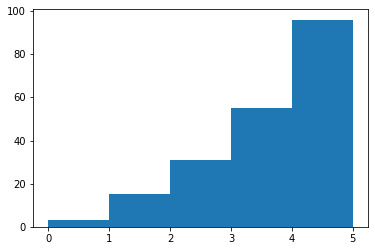

In [ ]:
rng = np.random.default_rng()
N = 200
b = [0,1,2,3,4,5]
 
c1_3 = (125 * rng.random(N))**(1/3)
df['(3) n'] = plt.hist(c1_3,bins=b)[0]

In [ ]:
df

,(1) P(x_a<=x<=x_b),(2) n_0,(3) n,(4) n,(5) n,(6) nh,(7) sig_nh,(8) s_n
"[x_a,x_b[",,,,,,,,
"[0, 1[",0.008,1.6,3.0,3.0,3.0,NaN,NaN,NaN
"[1, 2[",0.056,11.2,15.0,16.0,10.0,NaN,NaN,NaN
"[2, 3[",0.152,30.4,31.0,22.0,23.0,NaN,NaN,NaN
"[3, 4[",0.296,59.2,55.0,67.0,67.0,NaN,NaN,NaN
"[4, 5[",0.488,97.6,96.0,92.0,97.0,NaN,NaN,NaN


### 2)

Gere outros dois conjuntosde $n=200$ dados e preencha as colunas (4) e (5) do quadro.

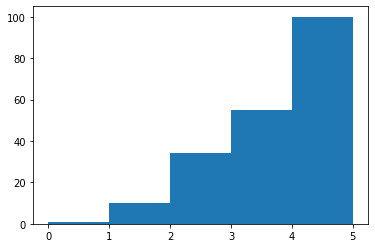

In [ ]:
c2_4 = (125 * rng.random(N))**(1/3)
df['(4) n'] = plt.hist(c2_4,bins=b)[0]

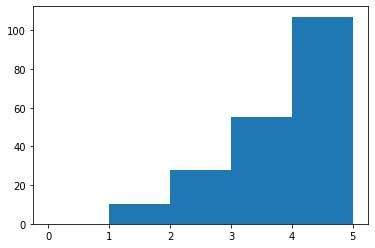

In [ ]:
c2_5 = (125 * rng.random(N))**(1/3)
df['(5) n'] = plt.hist(c2_5,bins=b)[0]

In [ ]:
df

,(1) P(x_a<=x<=x_b),(2) n_0,(3) n,(4) n,(5) n,(6) nh,(7) sig_nh,(8) s_n
"[x_a,x_b[",,,,,,,,
"[0, 1[",0.008,1.6,3.0,1.0,0.0,NaN,NaN,NaN
"[1, 2[",0.056,11.2,15.0,10.0,10.0,NaN,NaN,NaN
"[2, 3[",0.152,30.4,31.0,34.0,28.0,NaN,NaN,NaN
"[3, 4[",0.296,59.2,55.0,55.0,55.0,NaN,NaN,NaN
"[4, 5[",0.488,97.6,96.0,100.0,107.0,NaN,NaN,NaN


## d)

Gere $n_{REP} = 10^4$ conjuntos de $N=200$ dados e preencha as colunas (6) e (7) do quadro com o valor médio do número de ocorrências em cada intervalo, ñ, e sua respectiva incerteza(escreva esses valores com o número correto de algarismossignificativos)

In [ ]:
def binarize(a): return np.histogram(a, bins=b)[0]

In [ ]:
n_rep = 10000

x = (125 * rng.random((n_rep,N)))**(1/3)
d = np.apply_along_axis(binarize, axis=1, arr=x)
d.shape

(10000, 5)

In [ ]:
df['(6) nh'] = d.mean(axis=0)
d_std = d.std(axis=0, ddof=1)
df['(7) sig_nh'] = d_std/(d.shape[0]**(1/2))
df

,(1) P(x_a<=x<=x_b),(2) n_0,(3) n,(4) n,(5) n,(6) nh,(7) sig_nh,(8) s_n
"[x_a,x_b[",,,,,,,,
"[0, 1[",0.008,1.6,3.0,1.0,0.0,1.6201,0.012727,NaN
"[1, 2[",0.056,11.2,15.0,10.0,10.0,11.2303,0.032799,NaN
"[2, 3[",0.152,30.4,31.0,34.0,28.0,30.3722,0.051138,NaN
"[3, 4[",0.296,59.2,55.0,55.0,55.0,59.2612,0.063852,NaN
"[4, 5[",0.488,97.6,96.0,100.0,107.0,97.5162,0.071187,NaN


## e)

Calcule o desvio-padrão amostral do número de ocorrências em cada intervalo, $s_n$ (isto é a dispersão no número de casos em cada intervalo observados nas 10.000 simulações) e preencha a coluna (8) do quadro. Escreva esses desvios-padrões amostrais com o mesmo número de casas decimais usados para escrever os correspondentes valores médios[coluna (6)].

In [ ]:
df['(8) s_n'] = d_std
df

,(1) P(x_a<=x<=x_b),(2) n_0,(3) n,(4) n,(5) n,(6) nh,(7) sig_nh,(8) s_n
"[x_a,x_b[",,,,,,,,
"[0, 1[",0.008,1.6,3.0,1.0,0.0,1.6201,0.012727,1.272689
"[1, 2[",0.056,11.2,15.0,10.0,10.0,11.2303,0.032799,3.279930
"[2, 3[",0.152,30.4,31.0,34.0,28.0,30.3722,0.051138,5.113793
"[3, 4[",0.296,59.2,55.0,55.0,55.0,59.2612,0.063852,6.385237
"[4, 5[",0.488,97.6,96.0,100.0,107.0,97.5162,0.071187,7.118694


In [ ]:
df.to_csv('TEFE 2020 - Atividade 11.csv')